<a href="https://colab.research.google.com/github/1701309/knu_DBNA_1701309/blob/main/%EA%B9%80%EB%8F%99%ED%98%8411%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [4]:
tree = DecisionTreeClassifier(random_state=0)

In [5]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [6]:
print('Training Accuracy: {:.3f}'.format(tree.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(tree.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.937


In [7]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [8]:
print('Training Accuracy: {:.3f}'.format(tree.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(tree.score(X_test,y_test)))

Training Accuracy: 0.988
Test Accuracy: 0.951


In [9]:
from sklearn.tree import export_graphviz

In [10]:
export_graphviz(tree, out_file='tree.dot', class_names=["0","1"])

In [11]:
import graphviz

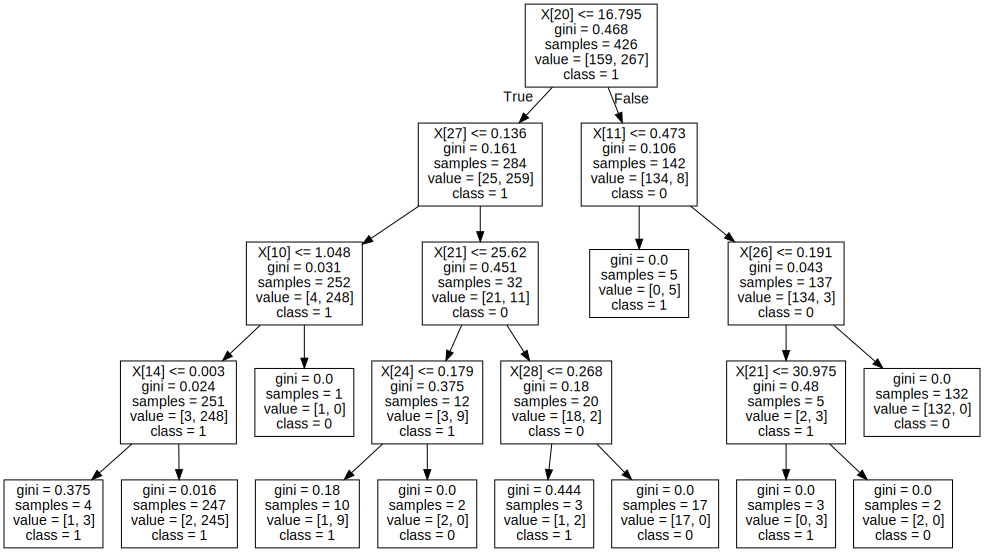

In [12]:
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [13]:
export_graphviz(tree, out_file='tree.dot', class_names=["0","1"], feature_names=cancer.feature_names, impurity=False, filled=True)

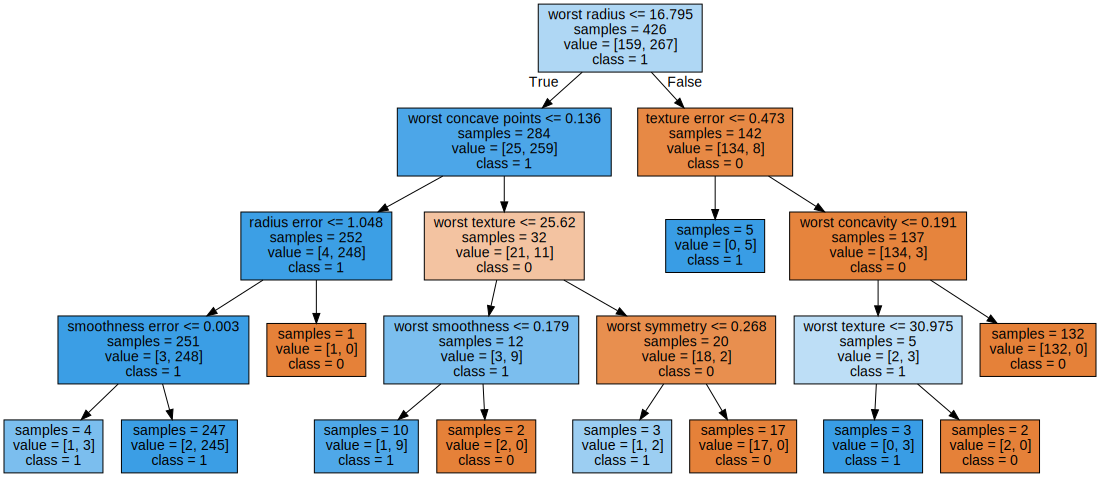

In [14]:
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [15]:
print("Feature importance: \n", tree.feature_importances_)

Feature importance: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [16]:
import numpy as np
import matplotlib.pyplot as plt

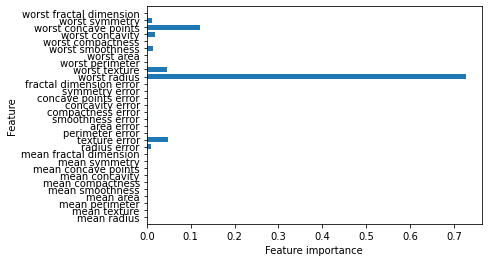

In [17]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

In [18]:
from sklearn.datasets import load_boston

In [19]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
tree = DecisionTreeRegressor(random_state =0)

In [24]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

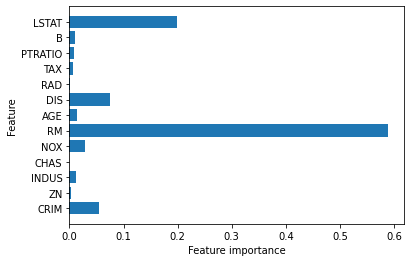

In [25]:
n_features = boston.data.shape[1]
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), boston.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [27]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

In [28]:
forest = RandomForestClassifier(n_estimators=5)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [29]:
print('Training Accuracy: {:,3f}',format(forest.score(X_train,y_train)))
print('Test Accuracy: {:,3f}',format(forest.score(X_test,y_test)))

Training Accuracy: {:,3f} 1.0
Test Accuracy: {:,3f} 0.96


In [30]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 3.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=d63af6812c5e03baaed04ffd15413b596559e88aa030f844259fd261603d3907
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [31]:
import mglearn

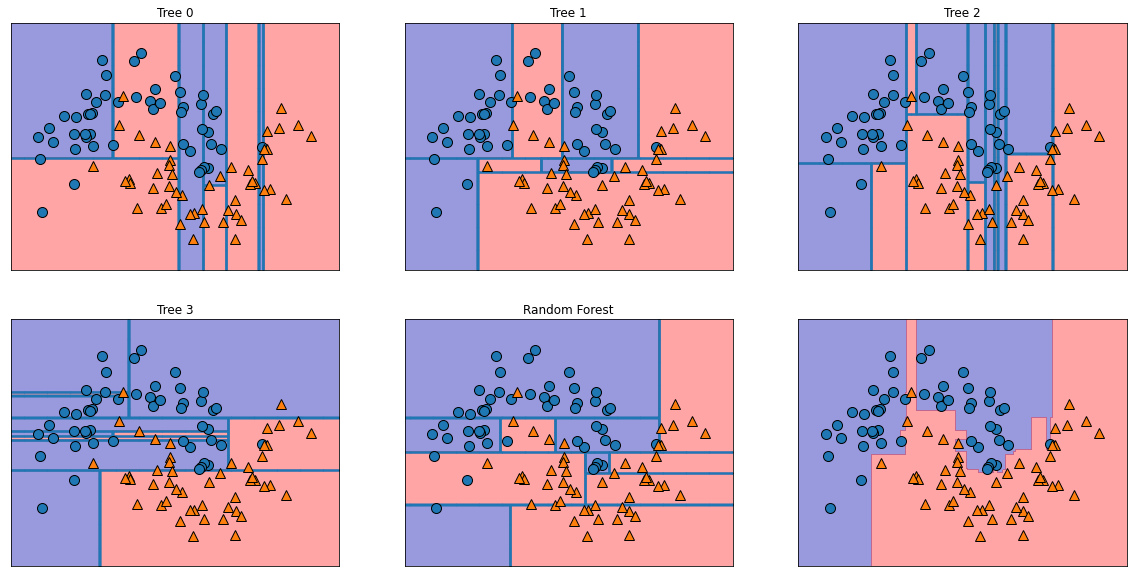

In [32]:
fig,axes =plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=0.4)
axes[-1,1].set_title('Random Forest')
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [34]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

print('Training Accuracy: {:.3f}'.format(forest.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(forest.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.944


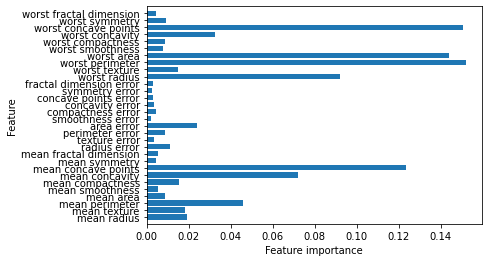

In [35]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.ylim(-1, n_features)
plt.show()

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gb = GradientBoostingClassifier(random_state = 0)
gb.fit(X_train,y_train)
print("Training Accuracy: {:.3f}".format(gb.score(X_train,y_train)))
print("Test Accuracy: {:.3f}".format(gb.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.958


In [38]:
gb = GradientBoostingClassifier(max_depth=1, random_state = 0)
gb.fit(X_train,y_train)
print("Training Accuracy: {:,3f}",format(gb.score(X_train,y_train)))
print("Test Accuracy: {:,3f}",format(gb.score(X_test,y_test)))

Training Accuracy: {:,3f} 0.9953051643192489
Test Accuracy: {:,3f} 0.965034965034965


In [39]:
gb = GradientBoostingClassifier(max_depth=4, learning_rate = 0.01, n_estimators=300, random_state = 0)
gb.fit(X_train,y_train)
print("Training Accuracy: {:,3f}",format(gb.score(X_train,y_train)))
print("Test Accuracy: {:,3f}",format(gb.score(X_test,y_test)))

Training Accuracy: {:,3f} 1.0
Test Accuracy: {:,3f} 0.9440559440559441


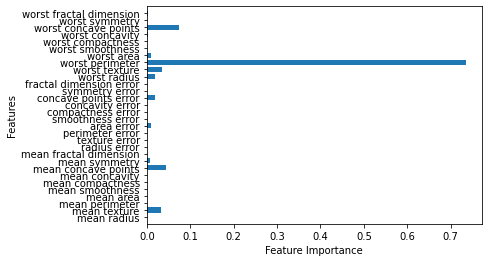

In [40]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), gb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.ylim(-1, n_features)
plt.show()

In [41]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 23.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 1.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 25.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.7 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516299 sha256=839d535fe3f02dbdd51f9fca1fbaf49d0e68986616afb9912376b3bf137e4ac4
  Stored in directory: /root/.cache/pip/wheel

In [44]:
import pydot
import cartopy

In [45]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor()

In [47]:
import xgboost

In [48]:
from xgboost import XGBClassifier

In [49]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print("Training Accuracy: {:.3f}".format(gb.score(X_train,y_train)))
print("Test Accuracy: {:.3f}".format(gb.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.944


In [50]:
xgb = XGBClassifier(max_depth=4, learning_rate=0.01, n_estimators=100, random_state=0)
xgb.fit(X_train,y_train)
print("Training Accuracy: {:.3f}".format(gb.score(X_train,y_train)))
print("Test Accuracy: {:.3f}".format(gb.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.944


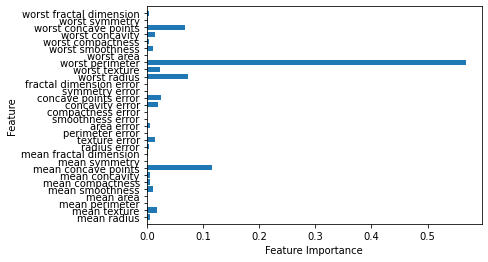

In [51]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), xgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()